In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation 
%matplotlib notebook
import mpl_toolkits.mplot3d.axes3d as p3

<IPython.core.display.Javascript object>


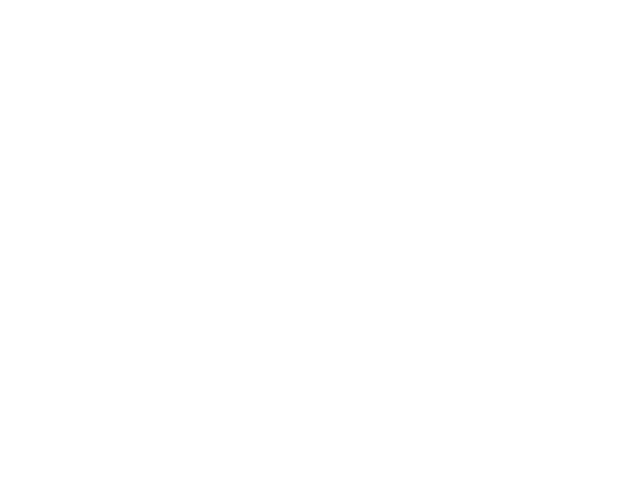

TypeError: gca() got an unexpected keyword argument 'projection'

In [2]:
# let's define an attitude with euler angles then represent that attitude in the various representations
# they follow the intrinsic Tait-Bryan angles following the z-y′-x″ convention
phi = np.pi/4      # "roll" FEEL FREE TO CHANGE THIS VALUE
theta = np.pi/4       # "pitch" FEEL FREE TO CHANGE THIS VALUE
psi = np.pi/4      # "yaw" FEEL FREE TO CHANGE THIS VALUE

# here's the conversion to a rotation matrix
A_x = np.array([[1, 0, 0],
               [0, np.cos(phi), -np.sin(phi)], 
               [0, np.sin(phi), np.cos(phi)]])
A_y = np.array([[np.cos(theta), 0, np.sin(theta)],
               [0, 1, 0], 
               [-np.sin(theta), 0, np.cos(theta)]])
A_z = np.array([[np.cos(psi), -np.sin(psi), 0],
               [np.sin(psi), np.cos(psi), 0], 
               [0, 0, 1]])
A = A_z @ A_y @ A_x

fig = plt.figure()
ax = p3.Axes3D(fig)
plt3d = fig.gca(projection='3d')
ax.quiver(0, 0, 0, 1, 0, 0, length=1.5, normalize=True, color = 'red')
ax.quiver(0, 0, 0, 0, 1, 0, length=1.5, normalize=True, color = 'green')
ax.quiver(0, 0, 0, 0, 0, 1, length=1.5, normalize=True, color = 'blue')
ax.set(xlim=(-1.5,1.5), 
          ylim=(-1.5,1.5), 
          zlim=(-1.5,1.5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

x_b, = ax.plot([0,A[0,0]], [0,A[0,1]], [0,A[0,2]], color = 'red', linewidth = 10)
y_b, = ax.plot([0,A[1,0]], [0,A[1,1]], [0,A[1,2]], color = 'green', linewidth = 10)
z_b, = ax.plot([0,A[2,0]], [0,A[2,1]], [0,A[2,2]], color = 'blue', linewidth = 10)

print("euler angle representation:")
print("phi = "+str(phi))
print("theta = "+str(theta))
print("psi = "+str(psi))
print("")
print("rotation matrix representation:")
print("A = "+str(A))

euler angle representation:
phi = 0.7853981633974483
theta = 0.7853981633974483
psi = 0.7853981633974483

euler axis:
e_a = [0.35740674 0.86285621 0.35740674]
angle = 1.1298707548043814

quaternion:
q = [0.19134172 0.46193977 0.19134172 0.8446232 ]


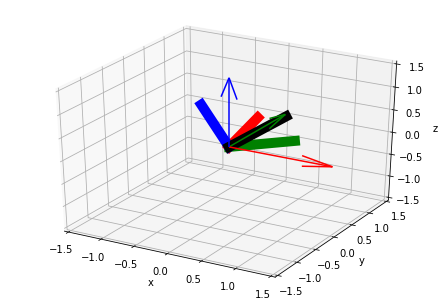

In [3]:
# now what if we convert this attitude representation to an euler axis?
# then a quaternion?

theta_a = np.arccos((A[0,0]+A[1,1]+A[2,2]-1)/2)
e_1 = (A[2,1]-A[1,2])/(2*np.sin(theta_a))
e_2 = (A[0,2]-A[2,0])/(2*np.sin(theta_a))
e_3 = (A[1,0]-A[0,1])/(2*np.sin(theta_a))

q_x = e_1*np.sin(theta_a/2)
q_y = e_2*np.sin(theta_a/2)
q_z = e_3*np.sin(theta_a/2)
q_w = np.cos(theta_a/2)

fig = plt.figure()
ax = p3.Axes3D(fig)
plt3d = fig.gca(projection='3d')
ax.quiver(0, 0, 0, 1, 0, 0, length=1.5, normalize=True, color = 'red')
ax.quiver(0, 0, 0, 0, 1, 0, length=1.5, normalize=True, color = 'green')
ax.quiver(0, 0, 0, 0, 0, 1, length=1.5, normalize=True, color = 'blue')
ax.set(xlim=(-1.5,1.5), 
          ylim=(-1.5,1.5), 
          zlim=(-1.5,1.5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
x_b, = ax.plot([0,A[0,0]], [0,A[0,1]], [0,A[0,2]], color = 'red', linewidth = 10)
y_b, = ax.plot([0,A[1,0]], [0,A[1,1]], [0,A[1,2]], color = 'green', linewidth = 10)
z_b, = ax.plot([0,A[2,0]], [0,A[2,1]], [0,A[2,2]], color = 'blue', linewidth = 10)
e_a = ax.plot([0,e_1], [0,e_2], [0,e_3], color = 'black', linewidth = 10)

print("euler angle representation:")
print("phi = "+str(phi))
print("theta = "+str(theta))
print("psi = "+str(psi))
print("")
print("euler axis:")
print("e_a = "+str(np.array([e_1,e_2,e_3])))
print("angle = "+str(theta_a))
print("")
print("quaternion:")
print("q = "+str(np.array([q_x,q_y,q_z,q_w])))

Text(0.5, 1.0, 'yaw over time')

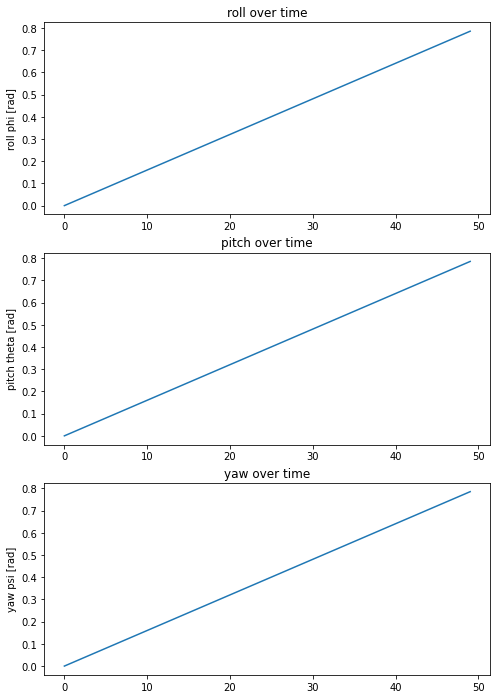

In [4]:
# let's define some euler angles to get a visual on the attitude over time
# they follow the intrinsic Tait-Bryan angles following the z-y′-x″ convention
phi_0 = 0      # initial "roll" FEEL FREE TO CHANGE THIS VALUE
phi_f = phi  # final "roll" FEEL FREE TO CHANGE THIS VALUE
theta_0 = 0       # initial "pitch" FEEL FREE TO CHANGE THIS VALUE
theta_f = theta       # final "pitch" FEEL FREE TO CHANGE THIS VALUE
psi_0 = 0      # initial "yaw" FEEL FREE TO CHANGE THIS VALUE
psi_f = psi      # final "yaw" FEEL FREE TO CHANGE THIS VALUE

# these variables hold 50 values linearly spaced from the initial value to the final value
phi = np.linspace(phi_0, phi_f, num=50)
theta = np.linspace(theta_0, theta_f, num=50)
psi = np.linspace(psi_0, psi_f, num=50)

fig = plt.figure(figsize=(8,12))
plt.subplot(311)
plt.plot(range(0,50),phi)
plt.ylabel('roll phi [rad]')
plt.title('roll over time')
plt.subplot(312)
plt.plot(range(0,50),theta)
plt.ylabel('pitch theta [rad]')
plt.title('pitch over time')
plt.subplot(313)
plt.plot(range(0,50),psi)
plt.ylabel('yaw psi [rad]')
plt.title('yaw over time')

(-1.1, 1.1)

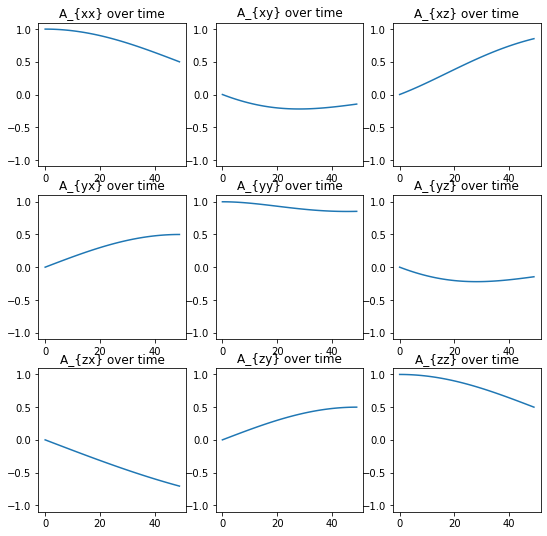

In [6]:
# let's convert to rotation matrices from each Euler angle at each "time" step 
A_x = [None] * len(phi)
A_y = [None] * len(phi)
A_z = [None] * len(phi)
A_t = np.zeros([len(phi),9])

for i in range(0,len(phi)):
    A_x[i] = np.array([[1, 0, 0],
                       [0, np.cos(phi[i]), -np.sin(phi[i])], 
                       [0, np.sin(phi[i]), np.cos(phi[i])]])
    A_y[i] = np.array([[np.cos(theta[i]), 0, np.sin(theta[i])],
                       [0, 1, 0], 
                       [-np.sin(theta[i]), 0, np.cos(theta[i])]])
    A_z[i] = np.array([[np.cos(psi[i]), -np.sin(psi[i]), 0],
                       [np.sin(psi[i]), np.cos(psi[i]), 0], 
                       [0, 0, 1]])
    A = A_z[i] @ A_y[i] @ A_x[i]
    A_t[i,0] = A[0,0]
    A_t[i,1] = A[0,1]
    A_t[i,2] = A[0,2]
    A_t[i,3] = A[1,0]
    A_t[i,4] = A[1,1]
    A_t[i,5] = A[1,2]
    A_t[i,6] = A[2,0]
    A_t[i,7] = A[2,1]
    A_t[i,8] = A[2,2]

fig = plt.figure(figsize=(9,9))
plt.subplot(331)
plt.plot(range(0,50),A_t[:,0])
plt.title('A_{xx} over time')
plt.ylim(-1.1,1.1)
plt.subplot(332)
plt.plot(range(0,50),A_t[:,1])
plt.title('A_{xy} over time')
plt.ylim(-1.1,1.1)
plt.subplot(333)
plt.plot(range(0,50),A_t[:,2])
plt.title('A_{xz} over time')
plt.ylim(-1.1,1.1)
plt.subplot(334)
plt.plot(range(0,50),A_t[:,3])
plt.title('A_{yx} over time')
plt.ylim(-1.1,1.1)
plt.subplot(335)
plt.plot(range(0,50),A_t[:,4])
plt.title('A_{yy} over time')
plt.ylim(-1.1,1.1)
plt.subplot(336)
plt.plot(range(0,50),A_t[:,5])
plt.title('A_{yz} over time')
plt.ylim(-1.1,1.1)
plt.subplot(337)
plt.plot(range(0,50),A_t[:,6])
plt.title('A_{zx} over time')
plt.ylim(-1.1,1.1)
plt.subplot(338)
plt.plot(range(0,50),A_t[:,7])
plt.title('A_{zy} over time')
plt.ylim(-1.1,1.1)
plt.subplot(339)
plt.plot(range(0,50),A_t[:,8])
plt.title('A_{zz} over time')
plt.ylim(-1.1,1.1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


(-1.1, 1.1)

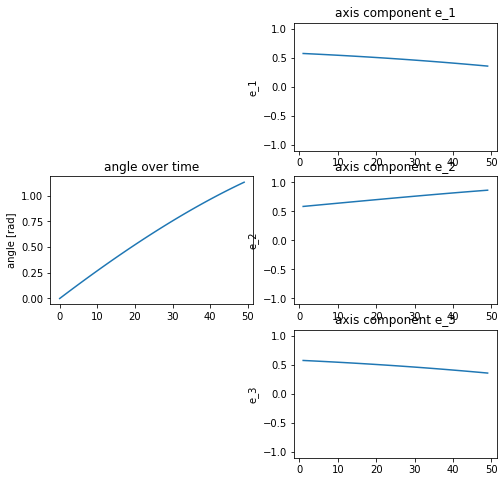

In [8]:
# let's convert to Euler axis/angle from rotation matrices
theta_a = [None] * len(phi)
e_1 = [None] * len(phi)
e_2 = [None] * len(phi)
e_3 = [None] * len(phi)

for i in range(0,len(phi)):
    A_11 = A_t[i,0];    A_12 = A_t[i,1];    A_13 = A_t[i,2] 
    A_21 = A_t[i,3];    A_22 = A_t[i,4];    A_23 = A_t[i,5]
    A_31 = A_t[i,6];    A_32 = A_t[i,7];    A_33 = A_t[i,8]
    theta_a[i] = np.arccos((A_11+A_22+A_33-1)/2)
    e_1[i] = (A_32-A_23)/(2*np.sin(theta_a[i]))
    e_2[i] = (A_13-A_31)/(2*np.sin(theta_a[i]))
    e_3[i] = (A_21-A_12)/(2*np.sin(theta_a[i]))

fig = plt.figure(figsize=(8,8))
plt.subplot(322)
plt.plot(range(0,50),e_1)
plt.ylabel('e_1')
plt.title('axis component e_1')
plt.ylim(-1.1,1.1)
plt.subplot(323)
plt.plot(range(0,50),theta_a)
plt.ylabel('angle [rad]')
plt.title('angle over time')
plt.subplot(324)
plt.plot(range(0,50),e_2)
plt.ylabel('e_2')
plt.title('axis component e_2')
plt.ylim(-1.1,1.1)
plt.subplot(326)
plt.plot(range(0,50),e_3)
plt.ylabel('e_3')
plt.title('axis component e_3')
plt.ylim(-1.1,1.1)


(-1.1, 1.1)

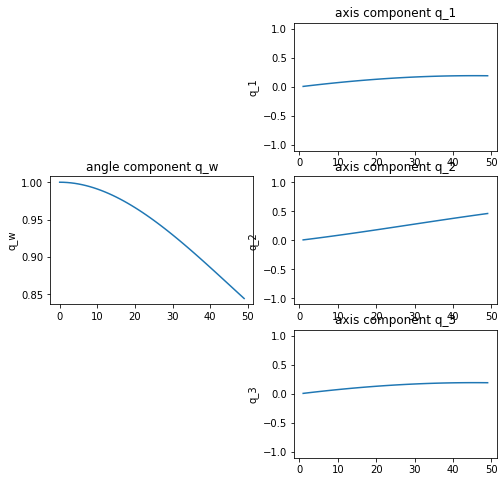

In [ ]:
# let's convert to quaternions from Euler axis/angle
q_w = [None] * len(phi)
q_x = [None] * len(phi)
q_y = [None] * len(phi)
q_z = [None] * len(phi)

for i in range(0,len(phi)):
    q_x[i] = e_1[i]*np.sin(theta_a[i]/2)
    q_y[i] = e_2[i]*np.sin(theta_a[i]/2)
    q_z[i] = e_3[i]*np.sin(theta_a[i]/2)
    q_w[i] = np.cos(theta_a[i]/2)

fig = plt.figure(figsize=(8,8))
plt.subplot(322)
plt.plot(range(0,50),q_x)
plt.ylabel('q_1')
plt.title('axis component q_1')
plt.ylim(-1.1,1.1)
plt.subplot(323)
plt.plot(range(0,50),q_w)
plt.ylabel('q_w')
plt.title('angle component q_w')
plt.subplot(324)
plt.plot(range(0,50),q_y)
plt.ylabel('q_2')
plt.title('axis component q_2')
plt.ylim(-1.1,1.1)
plt.subplot(326)
plt.plot(range(0,50),q_z)
plt.ylabel('q_3')
plt.title('axis component q_3')
plt.ylim(-1.1,1.1)


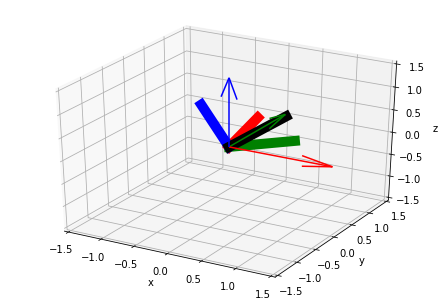

In [13]:
# animate what this rotation looks like
fig = plt.figure()
ax = p3.Axes3D(fig)
plt3d = fig.gca(projection='3d')
# object initialization
i = 0
ax.quiver(0, 0, 0, 1, 0, 0, length=1.5, normalize=True, color = 'red')
ax.quiver(0, 0, 0, 0, 1, 0, length=1.5, normalize=True, color = 'green')
ax.quiver(0, 0, 0, 0, 0, 1, length=1.5, normalize=True, color = 'blue')
ax.set(xlim=(-1.5,1.5), 
          ylim=(-1.5,1.5), 
          zlim=(-1.5,1.5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

x_b, = ax.plot([0,A_t[0,0]], [0,A_t[0,3]], [0,A_t[0,6]], color = 'red', linewidth = 10)
y_b, = ax.plot([0,A_t[0,1]], [0,A_t[0,4]], [0,A_t[0,7]], color = 'green', linewidth = 10)
z_b, = ax.plot([0,A_t[0,2]], [0,A_t[0,5]], [0,A_t[0,8]], color = 'blue', linewidth = 10)
e, = ax.plot([0,e_1[0]], [0,e_2[0]], [0,e_3[0]], color = 'black', linewidth = 10)

# animation function. This is called sequentially
def drawframe(n): 
    x_b.set_data([0,A_t[n,0]], [0,A_t[n,1]])
    x_b.set_3d_properties([0,A_t[n,2]], 'z')
    y_b.set_data([0,A_t[n,3]], [0,A_t[n,4]])
    y_b.set_3d_properties([0,A_t[n,5]], 'z')
    z_b.set_data([0,A_t[n,6]], [0,A_t[n,7]])
    z_b.set_3d_properties([0,A_t[n,8]], 'z')
    e.set_data([0,e_1[n]], [0,e_2[n]])
    e.set_3d_properties([0,e_3[n]], 'z')
    return (x_b, y_b, z_b, e)

anim = animation.FuncAnimation(fig, drawframe, frames=50, interval=20, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())

ValueError: ignored

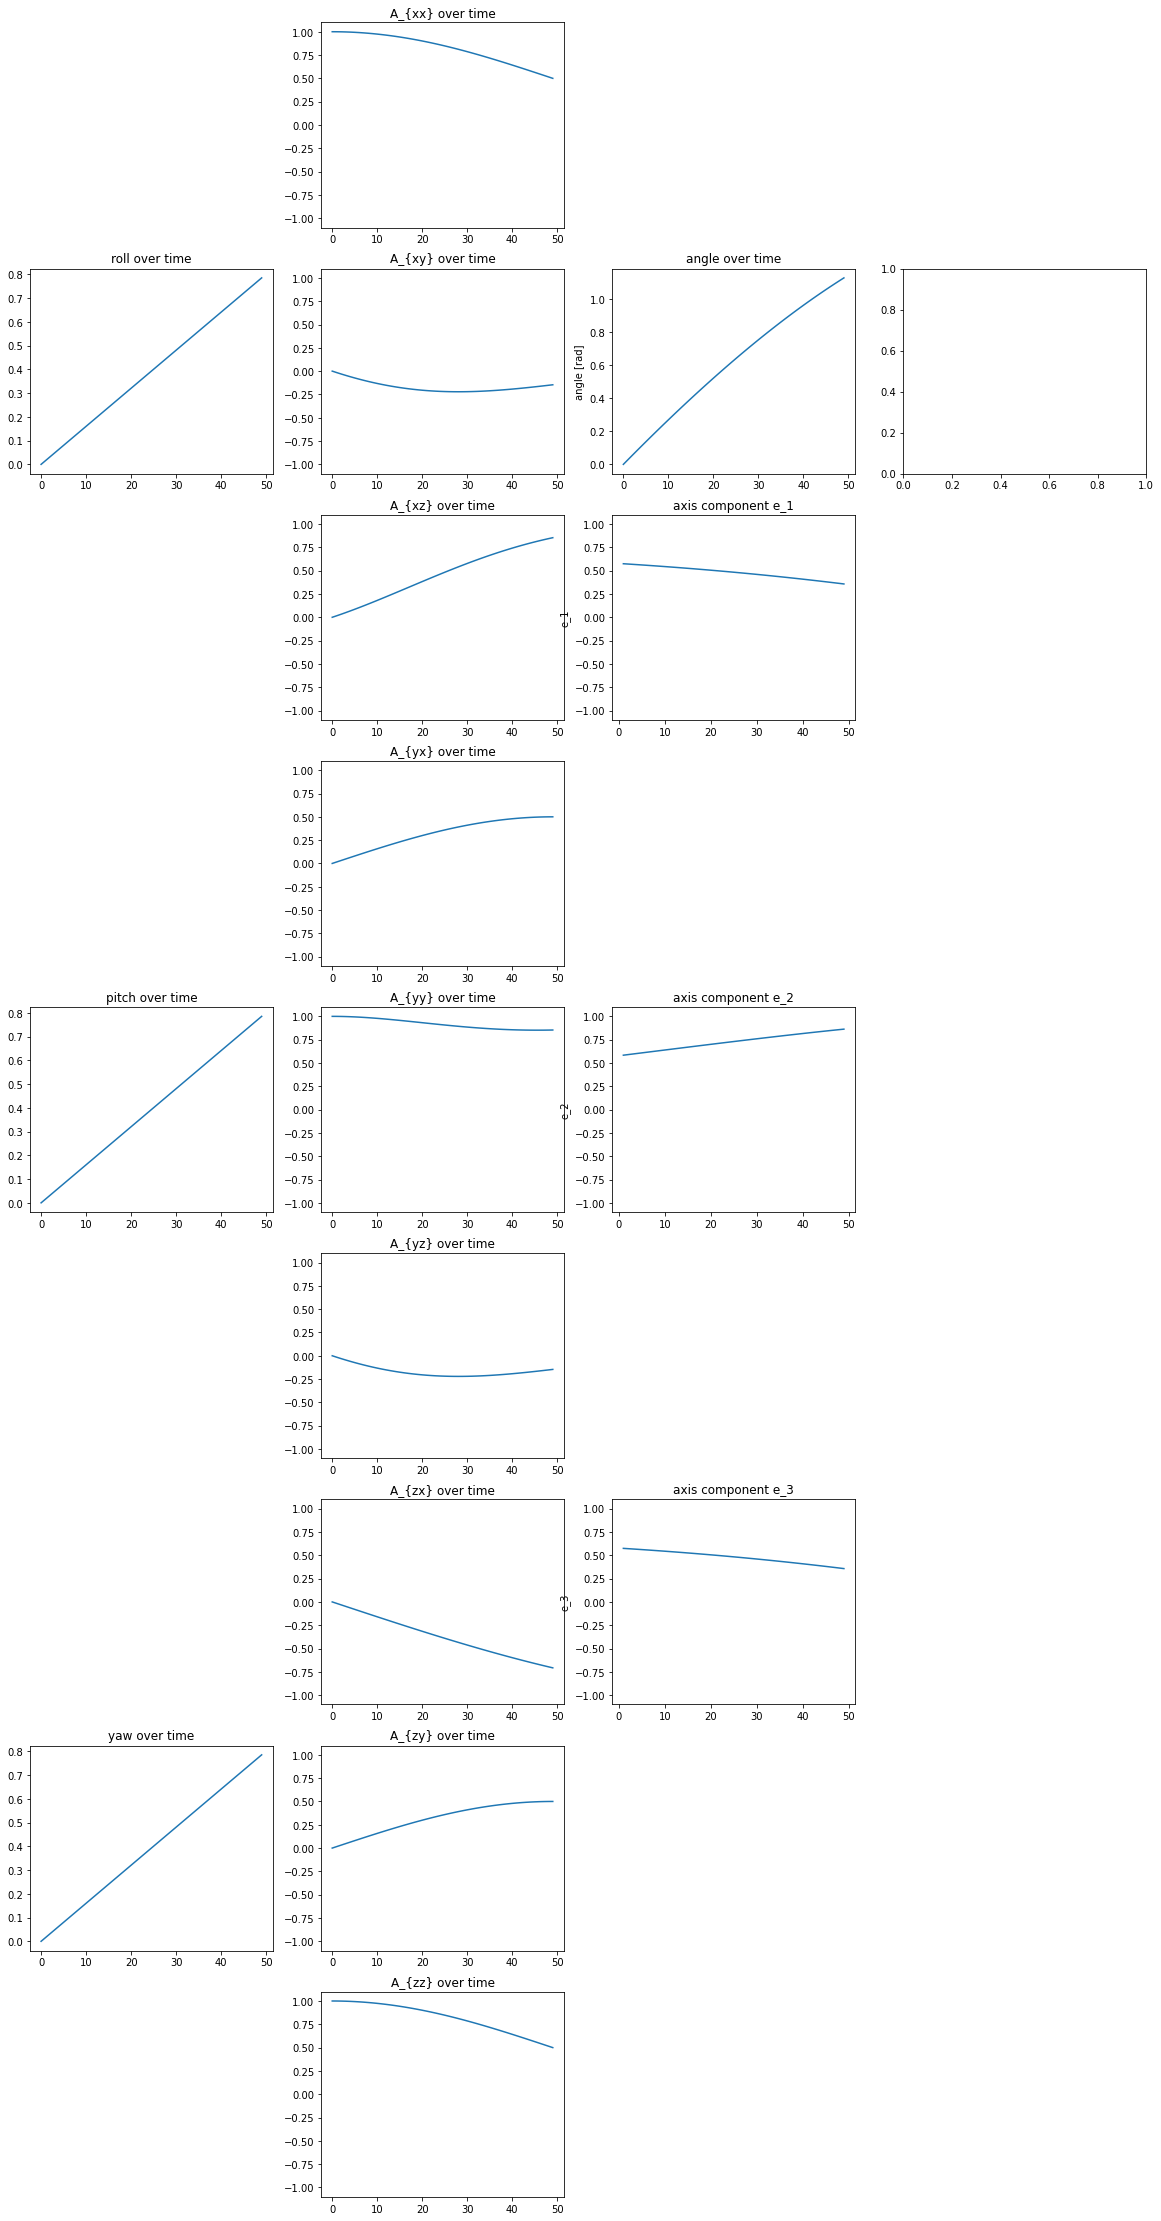

In [16]:
#comparison of attitude representations

# Euler angles
fig = plt.figure(figsize=(20,40))
plt.subplot(9,4,5)
plt.plot(range(0,50),phi)
plt.title('roll over time')
plt.subplot(9,4,17)
plt.plot(range(0,50),theta)
plt.title('pitch over time')
plt.subplot(9,4,29)
plt.plot(range(0,50),psi)
plt.title('yaw over time')

# rotation matrix
plt.subplot(9,4,2)
plt.plot(range(0,50),A_t[:,0])
plt.title('A_{xx} over time')
plt.ylim(-1.1,1.1)
plt.subplot(9,4,6)
plt.plot(range(0,50),A_t[:,1])
plt.title('A_{xy} over time')
plt.ylim(-1.1,1.1)
plt.subplot(9,4,10)
plt.plot(range(0,50),A_t[:,2])
plt.title('A_{xz} over time')
plt.ylim(-1.1,1.1)
plt.subplot(9,4,14)
plt.plot(range(0,50),A_t[:,3])
plt.title('A_{yx} over time')
plt.ylim(-1.1,1.1)
plt.subplot(9,4,18)
plt.plot(range(0,50),A_t[:,4])
plt.title('A_{yy} over time')
plt.ylim(-1.1,1.1)
plt.subplot(9,4,22)
plt.plot(range(0,50),A_t[:,5])
plt.title('A_{yz} over time')
plt.ylim(-1.1,1.1)
plt.subplot(9,4,26)
plt.plot(range(0,50),A_t[:,6])
plt.title('A_{zx} over time')
plt.ylim(-1.1,1.1)
plt.subplot(9,4,30)
plt.plot(range(0,50),A_t[:,7])
plt.title('A_{zy} over time')
plt.ylim(-1.1,1.1)
plt.subplot(9,4,34)
plt.plot(range(0,50),A_t[:,8])
plt.title('A_{zz} over time')
plt.ylim(-1.1,1.1)

#axis angle
plt.subplot(9,4,7)
plt.plot(range(0,50),theta_a)
plt.ylabel('angle [rad]')
plt.title('angle over time')
plt.subplot(9,4,11)
plt.plot(range(0,50),e_1)
plt.ylabel('e_1')
plt.title('axis component e_1')
plt.ylim(-1.1,1.1)
plt.subplot(9,4,19)
plt.plot(range(0,50),e_2)
plt.ylabel('e_2')
plt.title('axis component e_2')
plt.ylim(-1.1,1.1)
plt.subplot(9,4,27)
plt.plot(range(0,50),e_3)
plt.ylabel('e_3')
plt.title('axis component e_3')
plt.ylim(-1.1,1.1)

# quaternion
plt.subplot(9,4,8)
plt.plot(range(0,50),q_w)
plt.ylabel('q_w')
plt.title('angle component q_w')
plt.subplot(9,4,12)
plt.plot(range(0,50),q_x)
plt.ylabel('q_1')
plt.title('axis component q_1')
plt.ylim(-1.1,1.1)
plt.subplot(9,4,20)
plt.plot(range(0,50),q_y)
plt.ylabel('q_2')
plt.title('axis component q_2')
plt.ylim(-1.1,1.1)
plt.subplot(9,4,28)
plt.plot(range(0,50),q_z)
plt.ylabel('q_3')
plt.title('axis component q_3')
plt.ylim(-1.1,1.1)